# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import make_scorer
#from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#from scipy.stats import ttest_ind
import math


urls = {
    'train': 'https://code.s3.yandex.net/datasets/gold_recovery_train.csv',
    'test': 'https://code.s3.yandex.net/datasets/gold_recovery_test.csv',
    'full': 'https://code.s3.yandex.net/datasets/gold_recovery_full.csv'
}





In [2]:
df = {}

for i in urls.keys():
    df[i] = pd.read_csv(urls[i])
    print("======= ", i, " ========")
    print(df[i].info())


=======  train  ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.inpu

In [3]:
for i in df.keys():
    print("PRINT data set ", i)
    print(df[i].describe())

PRINT data set  train
       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16788.000000                 16788.000000   
mean                      4.716907                     9.113559   
std                       2.096718                     3.389495   
min                       0.000000                     0.000000   
25%                       3.971262                     8.825748   
50%                       4.869346                    10.065316   
75%                       5.821176                    11.054809   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16490.000000                 16789.000000   
mean                       8.301123                    39.467217   
std                        3.825760                    13.917227   
min                        0.000000                     0.000000   
25%                        6.93918

In [4]:

for i in df.keys():
    print("PRINT data set ", i)
    print(df[i].corr())

PRINT data set  train
                                            final.output.concentrate_ag  \
final.output.concentrate_ag                                    1.000000   
final.output.concentrate_pb                                    0.658131   
final.output.concentrate_sol                                   0.704695   
final.output.concentrate_au                                    0.653885   
final.output.recovery                                         -0.088691   
...                                                                 ...   
secondary_cleaner.state.floatbank5_a_level                     0.523151   
secondary_cleaner.state.floatbank5_b_air                       0.217985   
secondary_cleaner.state.floatbank5_b_level                     0.450114   
secondary_cleaner.state.floatbank6_a_air                       0.380291   
secondary_cleaner.state.floatbank6_a_level                     0.452430   

                                            final.output.concentrate_pb  \
fi

In [5]:
for i in df.keys():
    print("PRINT data set ", i)
    print(df[i].shape)

PRINT data set  train
(16860, 87)
PRINT data set  test
(5856, 53)
PRINT data set  full
(22716, 87)


In [6]:
for i in df.keys():
    print("PRINT data set ", i)
    print(df[i].head())

PRINT data set  train
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.6

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 100)

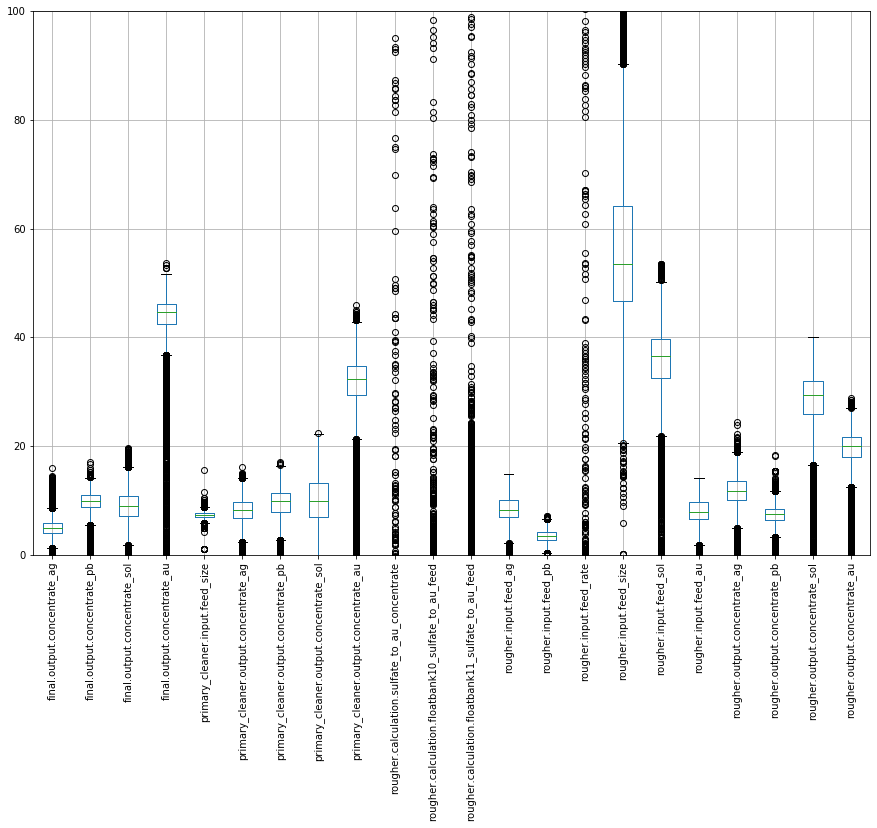

In [7]:
concentrat_list = []
for s in df['full'].columns.values:
    if "concentrate" in s or "feed" in s:
        concentrat_list.append(s)
ax = df['full'][concentrat_list].boxplot(rot=90, figsize=(15,10))
ax.set_ylim(0, 100)

### Вывод

- Большая часть данных в признаках *concentrate* находится в пределах от 0 до 20-60
- так же видим много выбросов

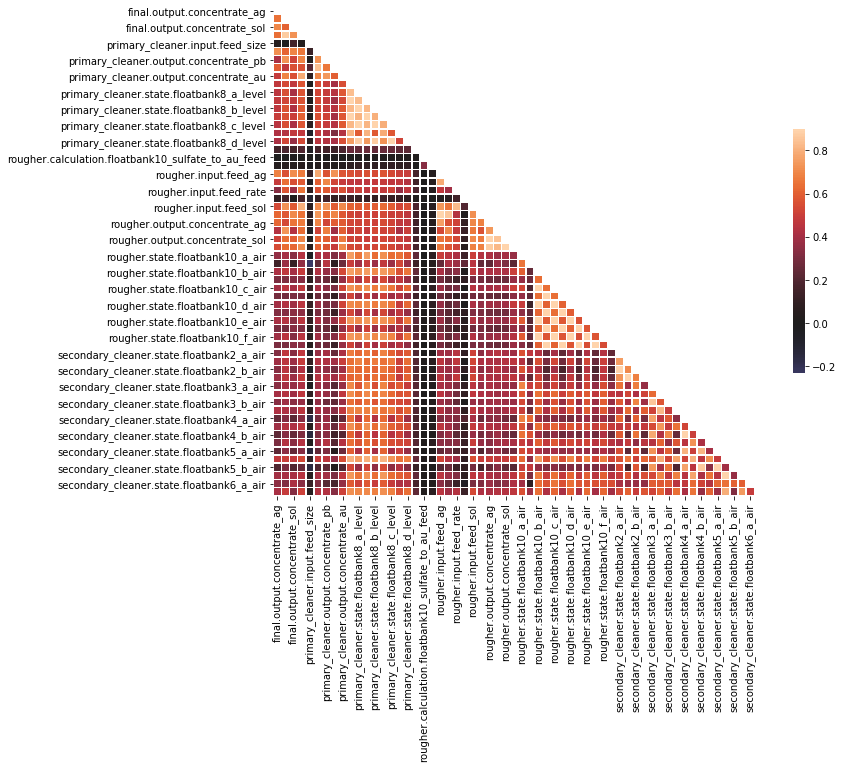

In [8]:
concentrat_list = []
for s in df['full'].columns.values:
    if "concentrate" in s or "feed" in s or "state" in s:
        concentrat_list.append(s)

corr = df['full'][concentrat_list].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask,  vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Вывод
Присутствует проблема мультиколлинеарности. Много признаком с коэф корреляции > 0.7. Если признаки сильно созависимы, то это приведет к переобучению регрессионной модели. Перед обучением надо будет удалить следующие признаки:

- primary_cleaner.state.floatbank8_a_level
- primary_cleaner.state.floatbank8_b_level
- primary_cleaner.state.floatbank8_c_level
- primary_cleaner.state.floatbank8_d_level
- rougher.state.floatbank10_a_air
- rougher.state.floatbank10_c_air 
- rougher.state.floatbank10_e_air
- secondary_cleaner.state.floatbank5_a_air

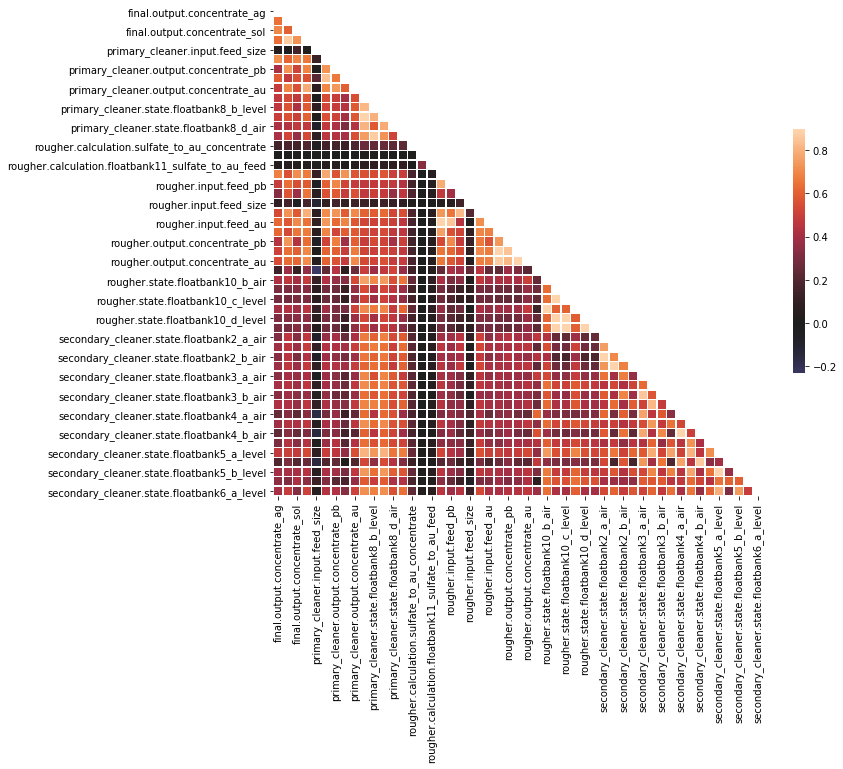

In [9]:
multicolliniary_columns = ['primary_cleaner.state.floatbank8_a_level','primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_c_level', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank5_a_air']
concentrat_list = []
for s in df['full'].columns.values:
    if "concentrate" in s or "feed" in s or "state" in s:
        concentrat_list.append(s)

corr = df['full'][concentrat_list].drop(columns=multicolliniary_columns).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask,  vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
def check_recovery(data):
    summ = 0
    n = 0
    for i in range(len(data)):
        recovery = data.loc[i, 'rougher.output.recovery']
        if recovery<=0 or math.isnan(recovery):
            continue
        f = data.loc[i,'rougher.input.feed_au']
        c = data.loc[i,'rougher.output.concentrate_au']
        t = data.loc[i,'rougher.output.tail_au']
        try:
            r = (c*(f-t)/(f*(c-t)))*100
        except:
            r = 0
        summ += abs(r-recovery)
        n += 1
    return summ/n
    

print("if recovery ok")
mae = check_recovery(df['train'])

print("MAE = ", mae)


if recovery ok
MAE =  9.661285240080234e-15


In [11]:
target_features = ['rougher.output.recovery', 'final.output.recovery']
features_difference = list(set(df['train'].columns)-set(df['test'].columns))


print("Difference between features of train and test:\n")
for i in sorted(features_difference):
    print(i)
    

Difference between features of train and test:

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
sec

In [12]:
test_features = list(df['test'].columns.values) + ['rougher.output.recovery'] + ['final.output.recovery']
df['train'] = df['train'].drop_duplicates()
df['test'] = df['test'].drop_duplicates()
df['test'] = df['test'].drop_duplicates()



In [13]:
concentrate_features = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_','final.output.concentrate_']
elements = ['ag', 'au', 'pb']

concentrate_features_list = []
for i in concentrate_features:
    for k in elements:
        concentrate_features_list.append(i+k)



### Вывод 

- изучили данные
- во многих признаках есть пропуски
- данные должны индексироваться по date, поэтому надо будет сменить индекс.
- Сравнили test и train выборки. все признаки в разнице это концентрации элементов в хвостах и в продукте
- тип параметров output. Т.е данные полученые после тех или иных этапов. И среди них те признаки которые нам надо предсказать: final.output.recovery, rougher.output.recovery
- провели проверку расчета эффективности обогащения. Расчитали MAE, значение близко к 0. Это значит, что эффективность расчитана верно
- провели проверку на мультиколлинеарность
- выбрали несколько мультиколлинеарных признаков для удаления перед обучением данных

Для предсказания rougher.output.recovery нам нужны только парметры типа input и state. Все остальные не влияют и могут вызвать утечку данных их надо будет удалить перед обучением

# 2. Анализ данных

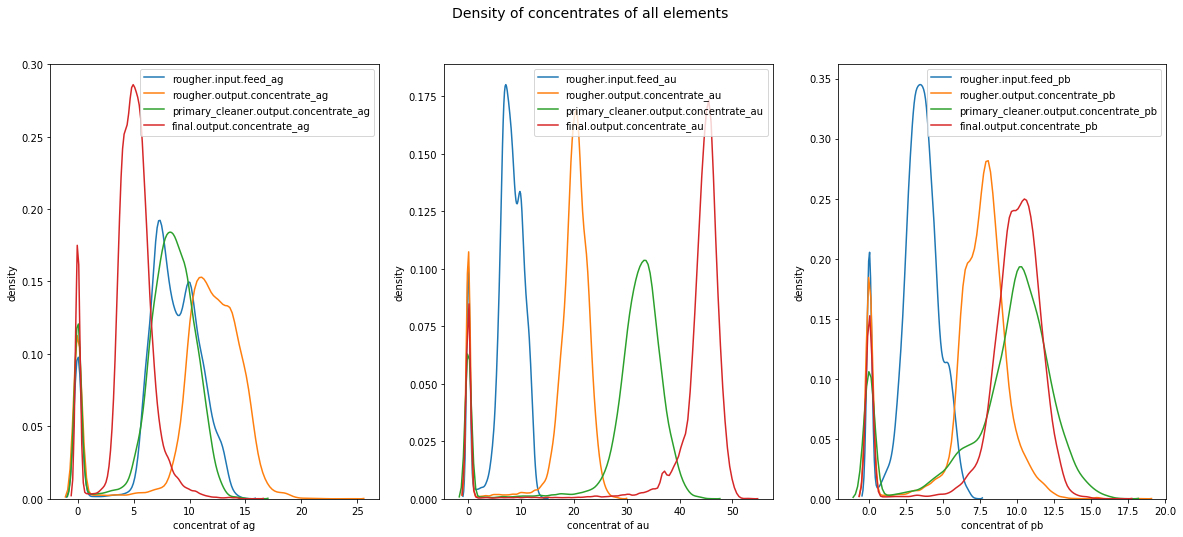

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
def get_element_data(name, data):
    features_list = []
    for i in concentrate_features:
        features_list.append(i+name)
    return data[features_list]

n = 0

for i in elements:
    el = get_element_data(i, df['full'])
    ax[n].set_xlabel("concentrat of "+i)
    ax[n].set_ylabel('density')
    for k in el.columns:
        sns.distplot(el[[k]], ax=ax[n], hist=False, label=k)
    n += 1

fig.suptitle("Density of concentrates of all elements", fontsize=14)
plt.show()



### Вывод

- концентрация золота растет после каждого этапа обработки
- концентрация серебра возрастает после флотации, но убывает после каждого этапа очистки
- концентрация свинца возрастает после флотации и первой очистки, но не меняется после второго этапа очистки.

Text(0, 0.5, 'density')

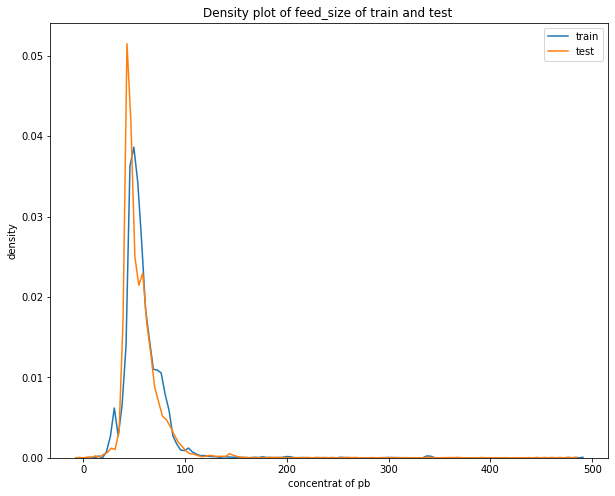

In [15]:

fig, bx = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

train_feed_size = df['train'].loc[:,'rougher.input.feed_size']
test_feed_size = df['test'].loc[:, 'rougher.input.feed_size']

ax = sns.distplot(train_feed_size, hist=False, label='train')
ax = sns.distplot(test_feed_size, hist=False, label='test', ax=ax)
ax.set_title('Density plot of feed_size of train and test ')
ax.set_xlabel("concentrat of "+i)
ax.set_ylabel('density')




#### Вывод

Распределения feed_size и на test и на train схожи поэтому наша модель должна работать хорошо.

Text(0, 0.5, 'density')

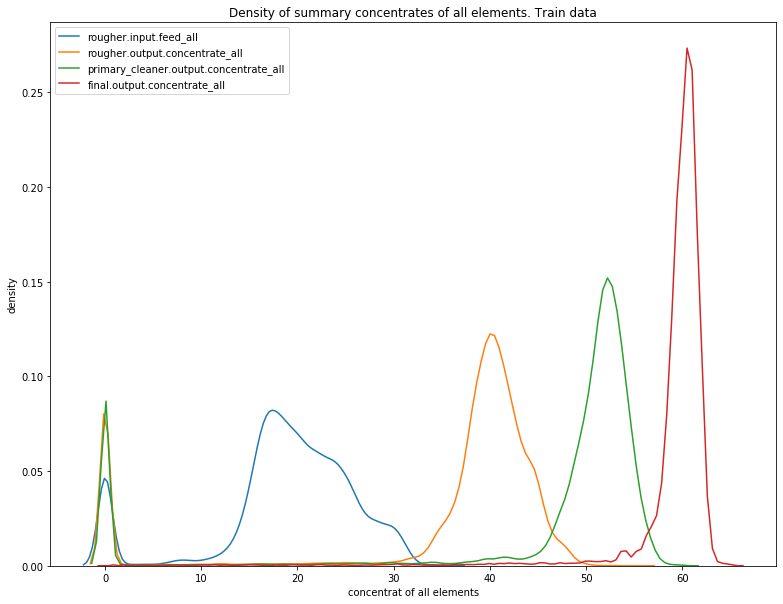

In [16]:

concentrate_features = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_','final.output.concentrate_']
elements = ['ag', 'au', 'pb']


summ = None

for i in elements:
    el = get_element_data(i, df['full'])
    try:
        summ = summ.join(el)
    except AttributeError:
        summ = el
    

fig = plt.figure(figsize=(13,10))
cx = fig.add_axes()

for i in concentrate_features:
    new_features_list = []
    for k in elements:
        new_features_list.append(i + k)
    new_name=i+'all'
    summ[new_name] = summ.loc[:, new_features_list].sum(axis=1)

    cx= sns.distplot(summ[new_name], hist=False, label=new_name)

cx.set_title('Density of summary concentrates of all elements. Train data')
cx.set_xlabel("concentrat of all elements")
cx.set_ylabel('density')




На графике видим сильный всплеск в районе 0. Вероятно эта аномалия вызвана некорректной выгрузкой данных или некорректной работой датчиков. Необходимо избавится от этих данных чтобы улучшить работу нашей модели. 

Text(0, 0.5, 'density')

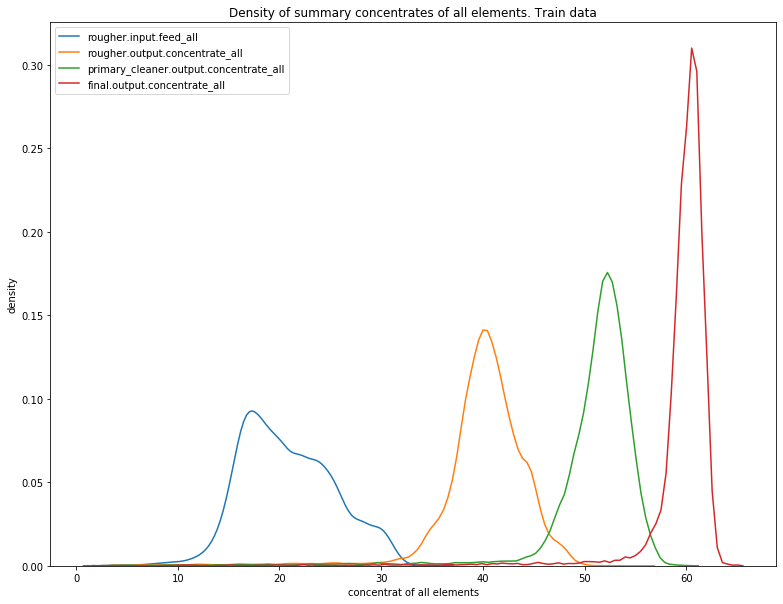

In [17]:
# Remove anomaly data


df['full'] = df['full'].ffill()
df['test'] = df['test'].ffill()
df['train'] = df['train'].ffill()

for i in concentrate_features:
    for k in elements:
        column = i + k
        df['full'] = df['full'].drop(df['full'][df['full'][column] < 0.5].index)
        df['train'] = df['train'].drop(df['train'][df['train'][column] < 0.5].index)
        
summ = None

for i in elements:
    el = get_element_data(i, df['full'])
    try:
        summ = summ.join(el)
    except AttributeError:
        summ = el


fig = plt.figure(figsize=(13,10))
cx = fig.add_axes()

for i in concentrate_features:
    new_features_list = []
    for k in elements:
        new_features_list.append(i + k)
    new_name=i+'all'
    summ[new_name] = summ.loc[:, new_features_list].sum(axis=1)

    cx= sns.distplot(summ[new_name], hist=False, label=new_name)

cx.set_title('Density of summary concentrates of all elements. Train data')
cx.set_xlabel("concentrat of all elements")
cx.set_ylabel('density')




### Вывод

- заметили аномалии по каждому элементу 
- заполнили nan значения методом ffill , т.к в условии сказано, что ближайшие значения схожи.
- удалили все строки где признаки концентрации меньше 0.5, т.к в этом случае можно считать значение слишком малым для дальнейшей обработки и его можно отбросить. 
- Распределения feed_size и на test и на train схожи поэтому мы можем начать обучение нашей модели.



# 3. Модель

In [18]:
def smape(x, y):
    sum = 0
    for i in range(len(x)):
        if x[i] == 0 and y[i]==0:
            continue
        sum += abs(x[i]-y[i])/(((abs(x[i])+abs(y[i]))/2))*100
    return sum/len(x)

def final_smape(smaper, smapef):
    return 0.25*smaper+0.75*smapef

def smape_scorer(true, predicted):
    rougher_predicted=[]
    final_predicted=[]
    for i in predicted:
        rougher_predicted.append(i[0])
        final_predicted.append(i[1])

    smape_rougher = smape(rougher_predicted, true['rougher.output.recovery'].values.tolist())
    smape_final = smape(final_predicted, true['final.output.recovery'].values.tolist())
    return final_smape(smape_rougher,smape_final)

In [19]:
############# Prepear datasets to fit and predict ##################


df['train'] = df['train'].drop(columns=multicolliniary_columns)
df['test'] = df['test'].drop(columns=multicolliniary_columns)

features_difference.remove('rougher.output.recovery')
features_difference.remove('final.output.recovery')
df['train'] = df['train'].drop(columns=features_difference)
df['train'] = df['train'].set_index('date')

df['test'] = df['test'].merge(df['full'].loc[:, ['date', 'rougher.output.recovery', 'final.output.recovery']], left_index=True, left_on='date', right_on='date')

train = df['train']
test = df['test'].set_index('date')

In [20]:
features_train = train.drop(columns = ['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train.loc[:, ['rougher.output.recovery', 'final.output.recovery']]

features_test = test.drop(columns = ['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = test.loc[:, ['rougher.output.recovery', 'final.output.recovery']]


In [21]:
features_train.shape, features_test.shape

((14204, 43), (5235, 43))

In [22]:
#########  Random Forest with GSCV ################

scorer = make_scorer(smape_scorer, greater_is_better=False)

parametrs = { 'n_estimators': [10, 12 ],
              'min_samples_leaf': [2,4]
             }

model = RandomForestRegressor(random_state=12345, min_samples_split=2, max_depth=18)

grid = GridSearchCV(model, parametrs, scoring = scorer ,  cv=5)
grid.fit(features_train, target_train)
print("Best param\n", grid.best_params_)
print()
predicted = grid.predict(features_train)
score = smape_scorer(target_train, predicted)

print("Final SMAPE score for TRAIN {:.2f}".format(score))

score = grid.score(features_train, target_train)
print("Cross val score {:.2f}".format(score*(-1)))

predicted = grid.predict(features_test)
score = smape_scorer(target_test, predicted)
print("Final SMAPE score for TEST {:.2f}".format(score))


Best param
 {'min_samples_leaf': 4, 'n_estimators': 12}

Final SMAPE score for TRAIN 3.52
Cross val score 3.52
Final SMAPE score for TEST 8.21


In [23]:
#########  Linear Regression with Cross Validation ################

model = LinearRegression()
scaler = StandardScaler()
       
print("Cross validation")
clf = make_pipeline(scaler, model)
scores = cross_val_score(clf, features_train, target_train, scoring = scorer, cv=5)
print("Final SMAPE score {:.2f}".format(sum(scores)*(-1)/len(scores)))

model.fit(features_train, target_train)
predicted = model.predict(features_test)
scores = smape_scorer(target_test, predicted)
print("Final SMAPE score for TEST {:.2f}".format(scores))


Cross validation
Final SMAPE score 9.95
Final SMAPE score for TEST 7.53


In [24]:
#########  Descision Tree ################

model = DecisionTreeRegressor(random_state=12345, max_depth=18)

print("Cross validation")
clf = make_pipeline(model)

scores = cross_val_score(model, features_train, target_train, scoring = scorer, cv=5)
print("Final SMAPE score {:.2f}".format(sum(scores)*(-1)/len(scores)))

model.fit(features_train, target_train)
predicted = model.predict(features_test)
scores = smape_scorer(target_test, predicted)
print("Final SMAPE score for TEST {:.2f}".format(scores))


Cross validation
Final SMAPE score 14.47
Final SMAPE score for TEST 12.32


In [25]:
##########  Dummy model ##############

model = DummyRegressor(strategy='mean')

print("Cross validation")
clf = make_pipeline(model)

scores = cross_val_score(model, features_train, target_train, scoring = scorer, cv=5)
print("Final SMAPE score {:.2f}".format(sum(scores)*(-1)/len(scores)))

model.fit(features_train, target_train)
predicted = model.predict(features_test)
scores = smape_scorer(target_test, predicted)
print("Final SMAPE score for TEST {:.2f}".format(scores))

Cross validation
Final SMAPE score 9.93
Final SMAPE score for TEST 8.09


### Вывод
- удалили лишние колонки из train, чтобы избежать утечки данных
- добавили целевые признаки в test из full, чтобы можно было оценить нашу модель.
- обучили три модели: решающее дерево, линеную регрессию и случайный лес
- лучшие результаты были получены линейной регрессией. smape 7.5
- проверили модель на адекватность, показатель выше чем у dummy модели.  